# Simple Linear Regression Implementation Using Gradient Descent

## Importing necessary libraries

In [1]:
import pandas as pd # Handling dataset
import numpy as np # Handling numbers
import matplotlib.pyplot as plt # Drawing charts

## Importing the Dataset

In [3]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values # Matrix of features
y = dataset.iloc[:, -1].values # Dependent variable

## Splitting the Dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Implementing Gradient Descent

In [5]:
epochs = 100000 # Number of iterations
theta_0 = 0 # Initializing the intercept
theta_1 = 0 # Initializing the coefficient
alpha = 1/250 # Learning rate
m = len(X_train) # Number of training set examples
for i in range(0, epochs):
    temp_0 = (theta_0 - (alpha * (1 / m) * sum([((theta_0 + theta_1 * X_train[j]) - y_train[j]) for j in range(0, m)])))
    theta_1 = (theta_1 - (alpha * (1 / m) * sum([((theta_0 + theta_1 * X_train[j]) - y_train[j]) * X_train[j] for j in range(0, m)])))
    if abs(temp_0 - theta_0) < 0.0000001: # Convergence condition
        break
    theta_0 = temp_0 

In [6]:
# Rounding values for convenience
theta_0 = np.round(theta_0, 5)
theta_1 = np.round(theta_1, 5)

In [7]:
theta_0

array([26968.71977])

## Predicting the Test set results

In [7]:
y_train_pred = [theta_0 + theta_1 * X_train[k] for k in range(0, len(X_train))]

In [8]:
y_test_pred = [theta_0 + theta_1 * X_test[k] for k in range(0, len(X_test))]

## Evaluating the Model

In [9]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.9204341591813463


## Visualising the Training set results

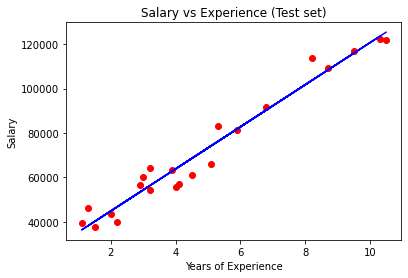

In [10]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_train_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

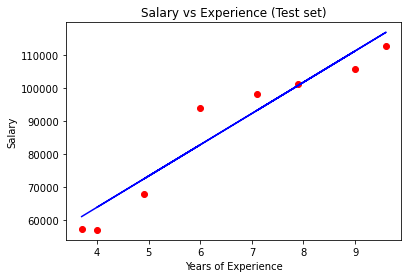

In [11]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_test_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()